# Malignant-Comments-Classifier-Project

## Problem Statement:
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

Data Set Description:
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:

* Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
* Highly Malignant: It denotes comments that are highly malignant and hurtful.
* Rude: It denotes comments that are very rude and offensive.
* Threat: It contains indication of the comments that are giving any threat to someone.
* Abuse: It is for comments that are abusive in nature.
* Loathe: It describes the comments which are hateful and loathing in nature.
* ID: It includes unique Ids associated with each comment text given.
* Comment text: This column contains the comments extracted from various social media platforms.

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. You need to build a model that can differentiate between comments and its categories.
Refer to the data set file provided along with this.

### Import Necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [15]:
# import train data and check 5 different samples

data = pd.read_csv('train.csv')
data.sample(n=5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
123776,960911b9b7193613,"Music \n\nPlenty of people, myself included, a...",0,0,0,0,0,0
69702,ba753eb154c6724d,Gibnews: I agree with you that the geographica...,0,0,0,0,0,0
117524,73e9acf642fb1157,40052.7076388889,0,0,0,0,0,0
63737,aa8b5cad5871ec88,(see Right wing styles of thought),0,0,0,0,0,0
22735,3c0741ca297ecae3,I hate you Zad68 unblock me you stupid motherf...,1,0,1,0,1,0


In [16]:
print('No. of Rows of train dataset :',data.shape[0])
print('No. of Columns of train dataset :',data.shape[1])

No. of Rows of train dataset : 159571
No. of Columns of train dataset : 8


In [17]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], object: ['id', 'comment_text']}

### Obervations:
This training Dataset has 159571 rows and 8 columns.

There are 6 numaric datatype and 2 categorical datatype.

In [18]:
# import test data and check 5 different samples

data_test=pd.read_csv('test.csv')
data_test.sample(n=5)

,id,comment_text
25210,2a03397e0dd8eb28,""" \n\n == R Buckminister Fuller usage of """"Jit..."
95062,9e9f4f1f790e764a,""" \n\n == Iconography of Venus in Italian Art ..."
25536,2a9da4c0840bfc28,""" \n\n ::There are linguistic standards that a..."
35999,3bd5c4207a261691,*Don't be silly. I get a level 2 for calling a...
94573,9dc6717c539865d9,"Yeah, I get pissed about those kind of deletio..."


In [19]:
print('No. of Rows of test dataset :',data_test.shape[0])
print('No. of Columns of test dataset :',data_test.shape[1])

No. of Rows of test dataset : 153164
No. of Columns of test dataset : 2


### Obervations:
This testing Dataset has 153164 rows and 2 columns.

In [20]:
data.isin([' --','null','NA',' ']).sum().any()

False

In [21]:
data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [22]:
data_test.isin([' --','null','NA',' ']).sum().any()

False

In [23]:
data_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [24]:
data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations:

* The training and testing dataset has no white space and --.
* This training and testing dataset is free from null.
* There is no special observation from describe() method as all of the features are binary in nature(0 and 1).

### Drop unnecessary columns:

In [25]:
data.drop('id',axis=1,inplace=True)
data_test.drop('id',axis=1,inplace=True)

In [26]:
count_types = data[[ 'malignant', 'highly_malignant', 'rude', 'threat','abuse', 
                    'loathe']].sum().to_frame().rename(columns={0:'Count'}).sort_values(by='Count')
count_types

,Count
threat,478
loathe,1405
highly_malignant,1595
abuse,7877
rude,8449
malignant,15294


<Figure size 1440x864 with 0 Axes>

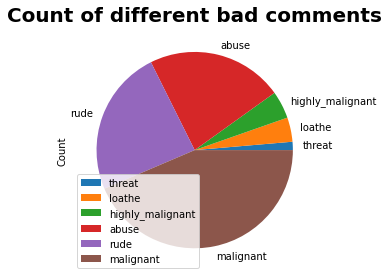

In [27]:
plt.figure(figsize =(20,12))
count_types.plot.pie(y='Count').legend(loc='lower left')
plt.title("Count of different bad comments", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Observations:

* Maximum negetive comments are malignant followed by threat.

# Exploratory analysis of features:

In [28]:
cat = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [29]:
for i in cat:
    print('Value Counts of',i)
    print(data[i].value_counts())
    print('='*20)

Value Counts of malignant
0    144277
1     15294
Name: malignant, dtype: int64
Value Counts of highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
Value Counts of rude
0    151122
1      8449
Name: rude, dtype: int64
Value Counts of threat
0    159093
1       478
Name: threat, dtype: int64
Value Counts of abuse
0    151694
1      7877
Name: abuse, dtype: int64
Value Counts of loathe
0    158166
1      1405
Name: loathe, dtype: int64


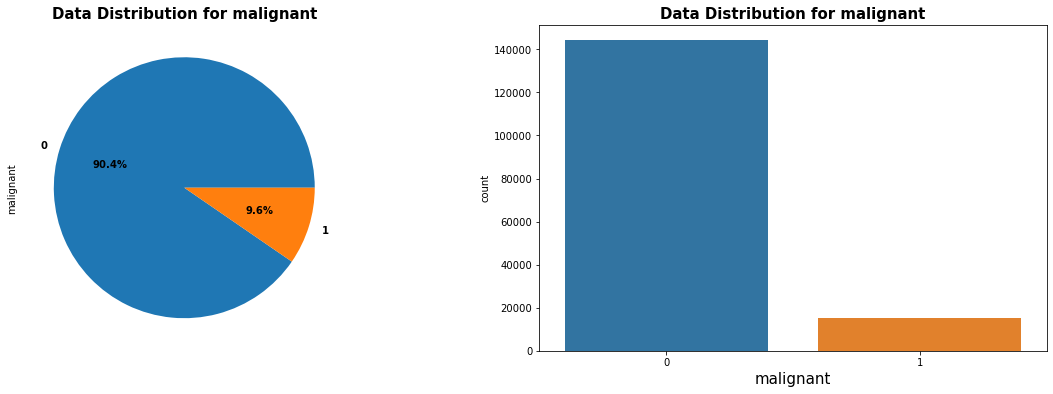

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['malignant'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Data Distribution for malignant', fontsize=15,fontweight ='bold')
sns.countplot('malignant',data=data ,ax=ax[1])
ax[1].set_title('Data Distribution for malignant',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('malignant',fontsize=15)
plt.show()

### Observations:

* For malignant comment distribution around 10% comment is malignant while 90% are good comments.

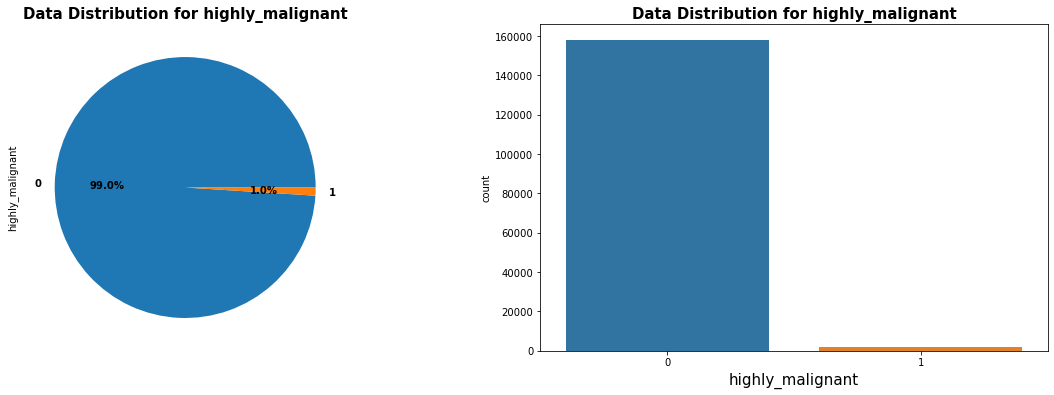

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['highly_malignant'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Data Distribution for highly_malignant', fontsize=15,fontweight ='bold')
sns.countplot('highly_malignant',data=data ,ax=ax[1])
ax[1].set_title('Data Distribution for highly_malignant',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('highly_malignant',fontsize=15)
plt.show()

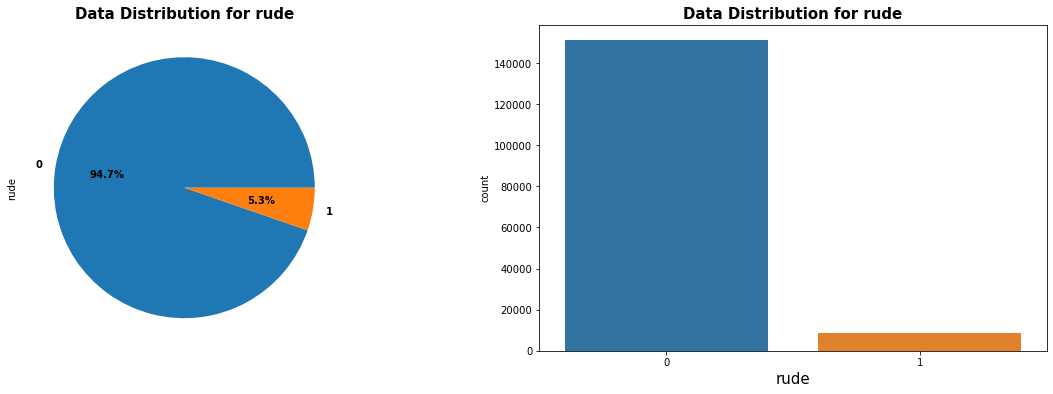

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['rude'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Data Distribution for rude', fontsize=15,fontweight ='bold')
sns.countplot('rude',data=data ,ax=ax[1])
ax[1].set_title('Data Distribution for rude',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('rude',fontsize=15)
plt.show()

### Observations:

* For highly_malignant comment distribution around 1% comment is highly_malignant while 99% are good comments.
* For rude comment distribution around 5% comment is rude while 95% are good comments.

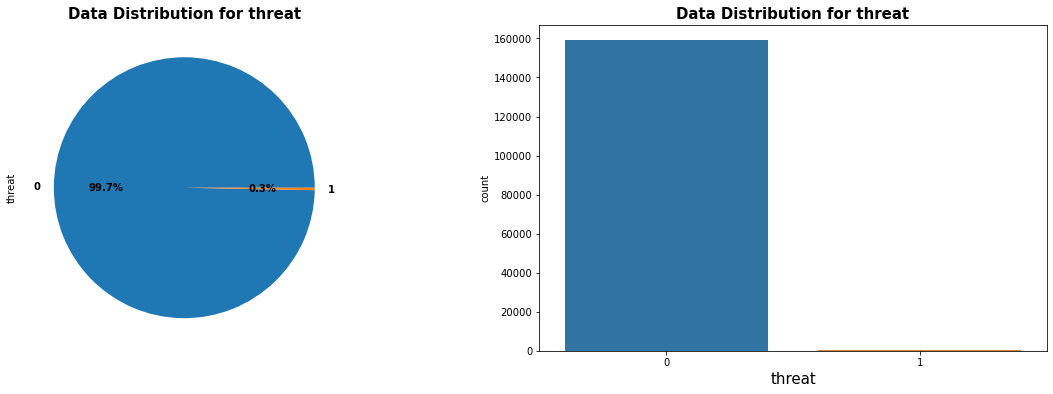

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['threat'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Data Distribution for threat', fontsize=15,fontweight ='bold')
sns.countplot('threat',data=data ,ax=ax[1])
ax[1].set_title('Data Distribution for threat',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('threat',fontsize=15)
plt.show()

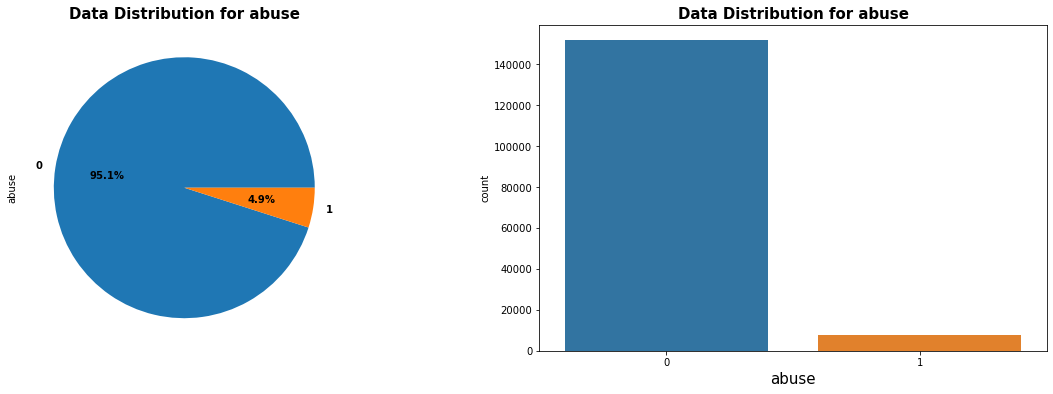

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['abuse'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Data Distribution for abuse', fontsize=15,fontweight ='bold')
sns.countplot('abuse',data=data ,ax=ax[1])
ax[1].set_title('Data Distribution for abuse',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('abuse',fontsize=15)
plt.show()

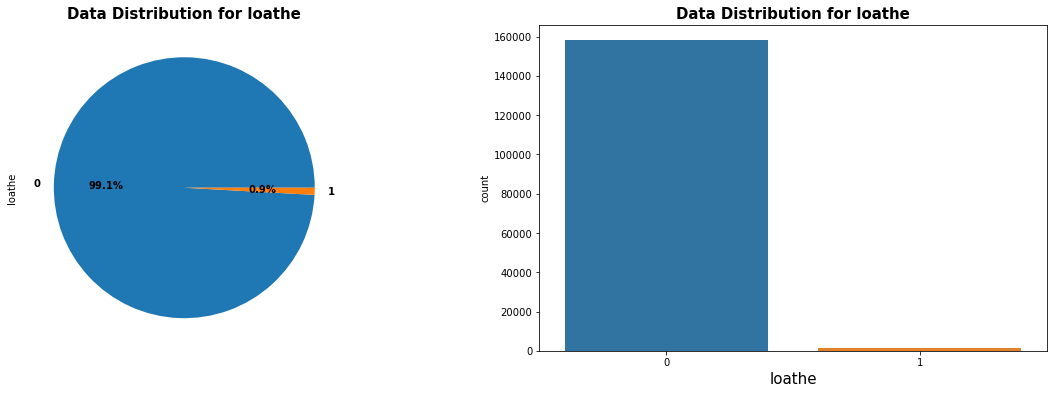

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['loathe'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Data Distribution for loathe', fontsize=15,fontweight ='bold')
sns.countplot('loathe',data=data ,ax=ax[1])
ax[1].set_title('Data Distribution for loathe',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('loathe',fontsize=15)
plt.show()

### Observations:
    
* For threat comment distribution only 0.3% comment is highly_malignant while 99.7% are not threatening comments.
* For abuse comment distribution around 5% comment is rude while 95% are good comments.
* For loathe comment distribution around 1% comment is rude while 99% are not loathe comments.

## Percentage of different negetive comment:

In [36]:
mal= data[(data['malignant']==1)]

per= (mal.shape[0]/data.shape[0])*100
print('Percentage of malignant comments = ',per)

Percentage of malignant comments =  9.584448302009765


In [37]:
high_mal = data[(data['highly_malignant']==1)]

per= (high_mal.shape[0]/data.shape[0])*100
print('Percentage of highly_malignant comments = ',per)

Percentage of highly_malignant comments =  0.9995550569965721


In [38]:
rude = data[(data['rude']==1)]

per=(rude.shape[0]/data.shape[0])*100
print('Percentage of rude comments = ',per)

Percentage of rude comments =  5.2948217407925


In [39]:
threat = data[(data['threat']==1)]

per= (threat.shape[0]/data.shape[0])*100
print('Percentage of threat comments = ',per)

Percentage of threat comments =  0.2995531769557125


In [40]:
abuse = data[(data['abuse']==1)]

per= (abuse.shape[0]/data.shape[0])*100
print('Percentage of abuse comments = ',per)

Percentage of abuse comments =  4.936360616904074


In [41]:
loathe = data[(data['loathe']==1)]

per= (loathe.shape[0]/data.shape[0])*100
print('Percentage of loathe comments = ',per)

Percentage of loathe comments =  0.8804858025581089


In [42]:
#Checking the percentage of the comments

good = data[(data['malignant']!=1) & (data['highly_malignant']!=1) & (data['rude']!=1) & (data['threat']!=1) 
    & (data['abuse']!=1) & (data['loathe']!=1)]

per= good.shape[0]/data.shape[0]*100
print('Percentage of good comments = ',per)
print('Percentage of negetive comments = ', (100-per))

Percentage of good comments =  89.83211235124176
Percentage of negetive comments =  10.167887648758239


### Observations:

* The minimum comment type is threat.
* Total percentage of negative comment is 10.2% while good comment is 89.8%.

In [43]:
data_count = data[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']].sum()
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

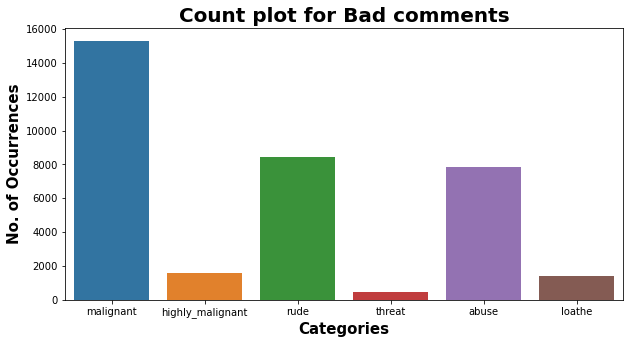

In [44]:
# Plot a chart with the following size
plt.figure(figsize =(10,5))

sns.barplot(data_count.index, data_count.values)

plt.title("Count plot for Bad comments", fontsize=20, fontweight='bold')
plt.ylabel('No. of Occurrences', fontsize=15, fontweight='bold')
plt.xlabel('Categories', fontsize=15, fontweight='bold')
plt.show()

# Observations:

* The maximum negative comments comes with Malignant in nature followed by rude categories.
* Very few comments comes with threatening nature.

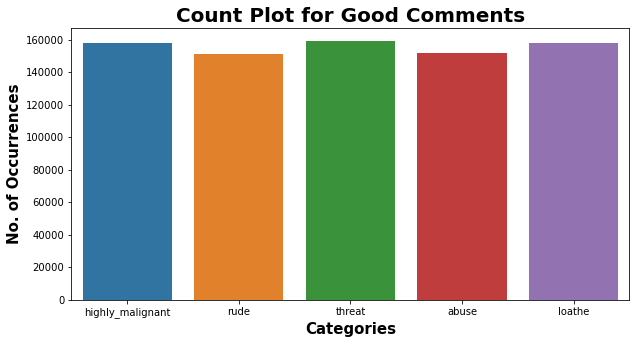

In [45]:
plt.figure(figsize =(10,5))
sns.countplot(data=data[data.columns[2:]][data[data.columns[2:]]==0])
plt.title("Count Plot for Good Comments", fontsize=20, fontweight='bold')
plt.ylabel('No. of Occurrences', fontsize=15, fontweight='bold')
plt.xlabel('Categories', fontsize=15, fontweight='bold')
plt.show()

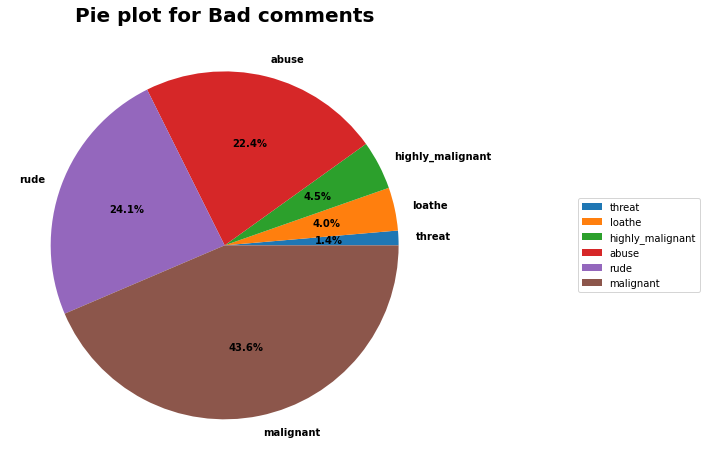

In [46]:
plt.figure(figsize =(8,8))
data_count.sort_values().plot.pie(autopct='%3.1f%%', 
                    textprops ={ 'fontweight': 'bold','fontsize':10}).legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.title("Pie plot for Bad comments", fontsize=20, fontweight='bold')
plt.ylabel('')
plt.show()

### Observation :

* Around 90% comments are Good while rest 10% comments are Negative in nature.
* Out of total negative comments around 43.58% are malignant in nature followed by 24.07% are rude comments.

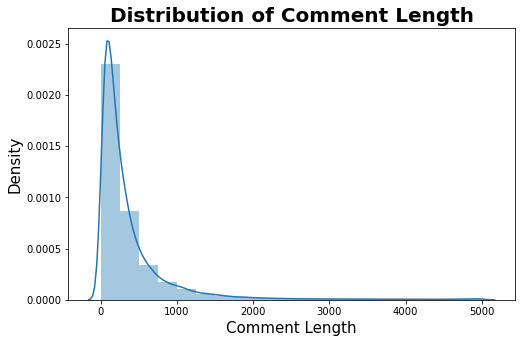

In [47]:
plt.figure(figsize=(8,5))
comment_len = data.comment_text.str.len()
sns.distplot(comment_len, bins=20)
plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=15)
plt.xlabel('Comment Length', fontsize=15)
plt.show()

In [48]:
comment_len.min()

5

In [49]:
comment_len.max()

5000

In [50]:
comment_len.median()

205.0

### Observations:

Above is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum length is 5. Median length being 250.

# Calcuate length before cleaning of 'comment_text' column of training and testing dataset:

In [51]:
data['length_before_cleaning'] = data['comment_text'].str.len()
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [52]:
data_test['length_before_cleaning'] = data_test['comment_text'].str.len()
data_test.head()

,comment_text,length_before_cleaning
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


# Cleaning of 'comment_text' column:

In [54]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
def clean_text_and_replace(df_column):
    
    # Making all lower case
    df_column = df_column.str.lower()
    
    # Replace email address with 'email'
    df_column = df_column.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','EMAIL_ADDRESS',regex=True)

    #ReplaceURLs with 'webaddress'
    df_column = df_column.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','WEB_ADDRESS',regex=True)

    #Replace money symbols with 'moneysymb'
    df_column = df_column.str.replace(r'£|\$','DOLLER',regex=True)

    #Replace 10 digit phone number 
    df_column = df_column.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','PHONE_NUMBER',regex=True)

    #Replace numbers with 'numbr'
    df_column = df_column.str.replace(r'\d+(\.\d+)?', 'NUMBER',regex=True)

    # Remove Punctuation 
    df_column = df_column.str.replace(r'[^\w\d\s]',' ',regex=True)

    #Replace Whitspace between terms with  a single space
    df_column = df_column.str.replace(r'\s+',' ',regex=True)

    #Remove leading and trailing whitespace
    df_column = df_column.str.replace(r'^\s+|\s+?$',' ',regex=True)

    # Remove Stop words 
    stop_words = set(stopwords.words('english') + ['u','ur','4','2','im','dont','doin','I','numbr','YOU','You','A','If','one','The','page','would','article','talk','like','know','THE','people','get'])
    df_column = df_column.apply(lambda x: ' '.join(
            term for term in x.split() if term not in stop_words))
    
    
    return df_column

In [58]:
import nltk

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shalini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [60]:
data['comment_text'] = clean_text_and_replace(data['comment_text'])

In [61]:
data['comment_text']=data['comment_text'].str.lower()

In [62]:
data['length_after_cleaning'] = data['comment_text'].str.len()

In [63]:
# Total length removal
print ('Origial Length', data.length_before_cleaning.sum())
print ('Clean Length', data.length_after_cleaning.sum())

Origial Length 62893130
Clean Length 39132577


### Observations:
Origial Length of comment_text column of train dataset is 62893130 and after removing all space, unwanted punctuation and replace email, website, phone number with appropiate keywords the length of comment_text is 39132577

In [64]:
data_test['comment_text'] = clean_text_and_replace(data_test['comment_text'])

In [65]:
data_test['comment_text'].str.lower()

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                               sources zawe ashton lapland
3         look back source information updated correct f...
4                                 anonymously edit articles
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate faster throwing cut man...
153161    okinotorishima categories see changes agree co...
153162    founding nations eu germany law return quite s...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [66]:
data_test['length_after_cleaning'] = data_test['comment_text'].str.len()

In [67]:
print ('Origian Length', data_test.length_before_cleaning.sum())
print ('Clean Length', data_test.length_after_cleaning.sum())

Origian Length 55885733
Clean Length 34892919


### Observations:
Origial Length of comment_text column of test dataset is 55885733 and after removing all space, unwanted punctuation and replace email, website, phone number with appropiate keywords the length of comment_text is 34892919.

# Word Cloud for different Feature:

We can see from the word clouds above that small texts are given less weight in their respective comment types than large texts are.

## 1. For Malignant:

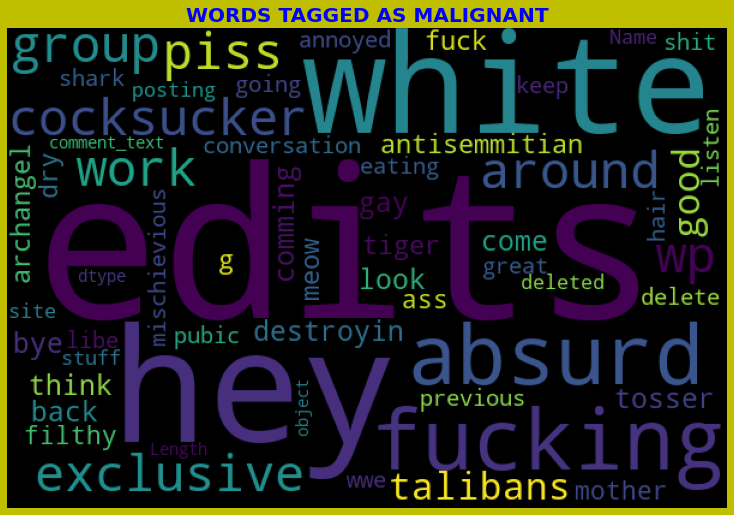

In [68]:
from wordcloud import WordCloud
mal = data['comment_text'][data['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black', max_words=200).generate(str(mal))
plt.figure(figsize=(10,7),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'blue'})
plt.show()

### Observations:
From wordcloud of malignant comments, it is clear that it mostly consists of words like edits, hey, white, fucking,absurd,piss cocksucker, taliban etc.

## 2. For Highly Malignant:

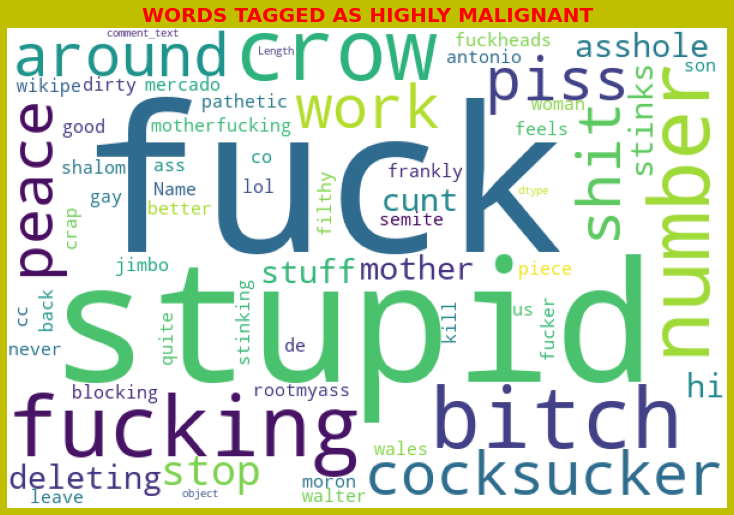

In [69]:
from wordcloud import WordCloud
mal = data['comment_text'][data['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white', max_words=200).generate(str(mal))
plt.figure(figsize=(10,7),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'red'})
plt.show()

### Observations:
From wordcloud of highly malignant comments, it is clear that it mostly consists of words like fuck, stupid, fucking, stupid, cocksucker, crow, piss, bitch, around, asshole etc.

## 3. For Rude:

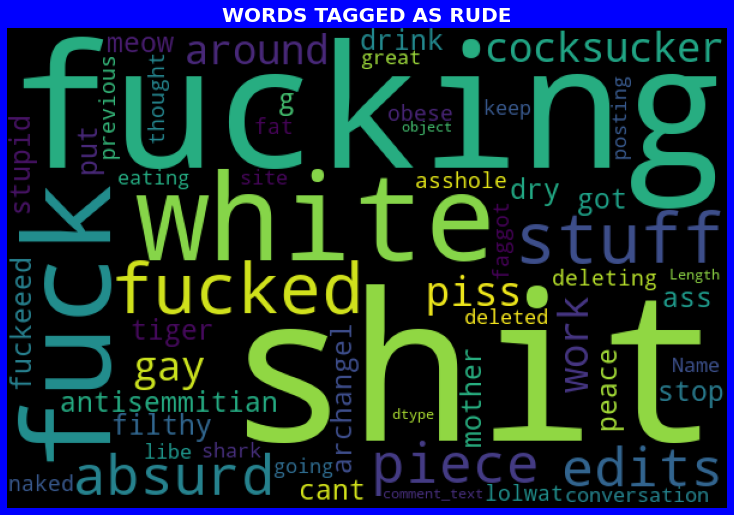

In [70]:
from wordcloud import WordCloud
mal = data['comment_text'][data['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black', max_words=200).generate(str(mal))
plt.figure(figsize=(10,7),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'white'})
plt.show()

### Observations:
From wordcloud of rude comments, it is clear that it mostly consists of words like shit, fucking, stuff, fucked, white, absurd, piece etc.

## 4. For Threat:

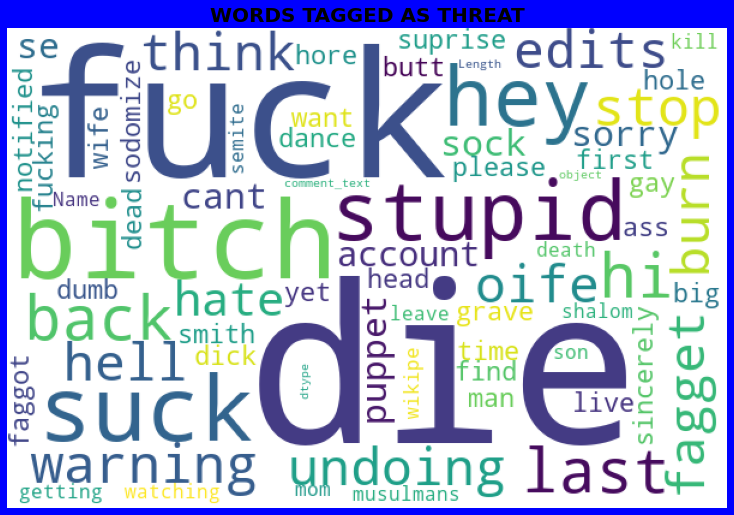

In [71]:
from wordcloud import WordCloud
mal = data['comment_text'][data['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white', max_words=200).generate(str(mal))
plt.figure(figsize=(10,7),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'black'})
plt.show()

### Observations:
From wordcloud of threat comments, it is clear that it mostly consists of words like die, bitch, fuck, suck, stupid, back, hey, hi, back, last etc.

## 5. For Abuse:

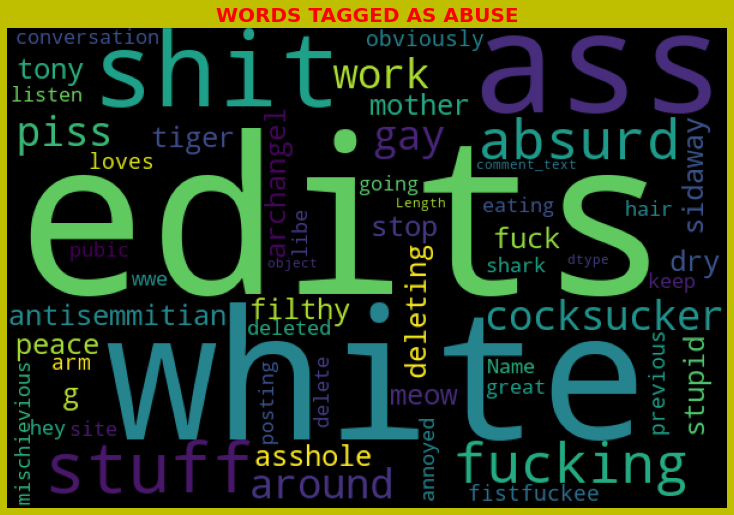

In [72]:
from wordcloud import WordCloud
mal = data['comment_text'][data['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black', max_words=200).generate(str(mal))
plt.figure(figsize=(10,7),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'red'})
plt.show()

### Observations:
From wordcloud of abuse comments, it is clear that it mostly consists of words like edits, white, ass, stuff, shit, piss, fucking, cocksucker, antisemmitian, gay etc.

## 6. For Loathe:

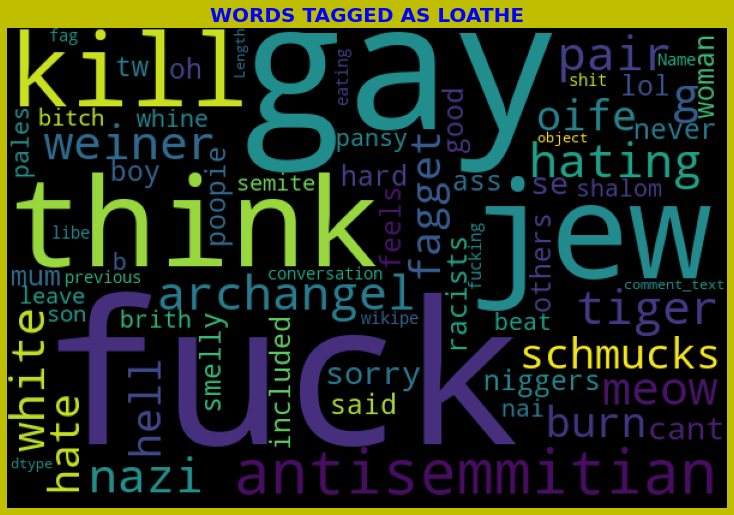

In [73]:
from wordcloud import WordCloud
mal = data['comment_text'][data['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black', max_words=200).generate(str(mal))
plt.figure(figsize=(10,7),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'blue'})
plt.show()

### Observations:
From wordcloud of abuse comments, it is clear that it mostly consists of words like fuck, gay, jew, kill, antisemmitian, think etc.

# Make new column named negetive_comments:

In [74]:
target_data = data[['malignant','highly_malignant','rude','threat','abuse','loathe']]

data['negetive_comments'] =data[['malignant','highly_malignant','rude','threat','abuse','loathe']].sum(axis =1)
print(data['negetive_comments'].value_counts())
data['negetive_comments'] = data['negetive_comments'] > 0 
data['negetive_comments'] = data['negetive_comments'].astype(int)
print(data['negetive_comments'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: negetive_comments, dtype: int64
0    143346
1     16225
Name: negetive_comments, dtype: int64


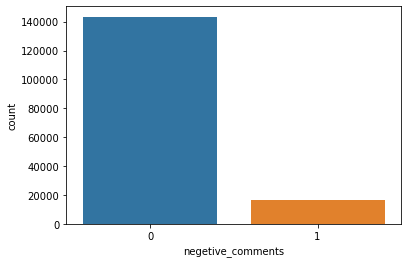

In [75]:
sns.countplot(x="negetive_comments" , data = data)
plt.show()

In [76]:
from collections import Counter
Counter(' '.join(data[data['negetive_comments'] == 0]['comment_text']).split()).most_common(10)

[('number', 150584),
 ('wikipedia', 44490),
 ('please', 28749),
 ('see', 20561),
 ('also', 19808),
 ('think', 18687),
 ('edit', 17229),
 ('articles', 16155),
 ('use', 16081),
 ('may', 15259)]

In [77]:
Counter(' '.join(data[data['negetive_comments'] == 1]['comment_text']).split()).most_common(10)

[('fuck', 9999),
 ('number', 9502),
 ('wikipedia', 3931),
 ('shit', 3693),
 ('fucking', 3337),
 ('nigger', 3306),
 ('suck', 3249),
 ('ass', 3003),
 ('go', 2964),
 ('hate', 2656)]

### Observations:
For good comment the mostly used words are number, wikipedia, please, see, also etc.
For negetive_comments the mostly used words are fuck, number, wikipedia, shit, fucking, nigger, suck, ass etc.

# Correlations:

In [78]:
data1= data.drop(['comment_text'], axis=1)

In [79]:
data1.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,length_before_cleaning,length_after_cleaning,negetive_comments
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.054413,-0.050553,0.967748
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.010175,0.015884,0.298666
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.042910,-0.037972,0.702812
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.007917,-0.009601,0.162925
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.045027,-0.040911,0.677324
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.013628,-0.007217,0.280144
length_before_cleaning,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,1.000000,0.983982,-0.051643
length_after_cleaning,-0.050553,0.015884,-0.037972,-0.009601,-0.040911,-0.007217,0.983982,1.000000,-0.048417
negetive_comments,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,-0.051643,-0.048417,1.000000


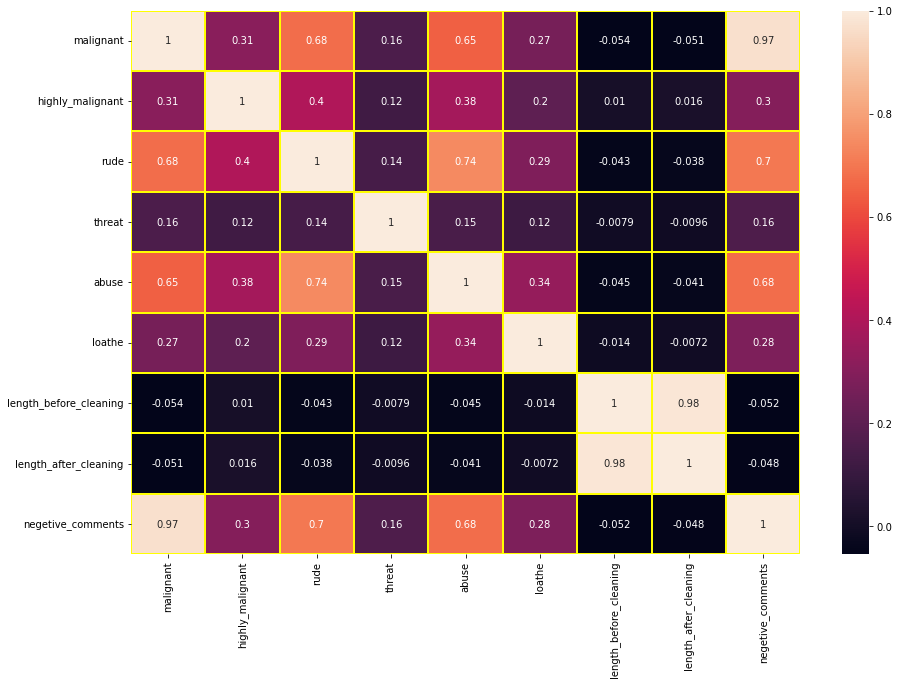

In [80]:
plt.subplots(figsize=(15,10))
sns.heatmap(data1.corr(), annot= True, linecolor= "yellow",  linewidths=2)
plt.show()

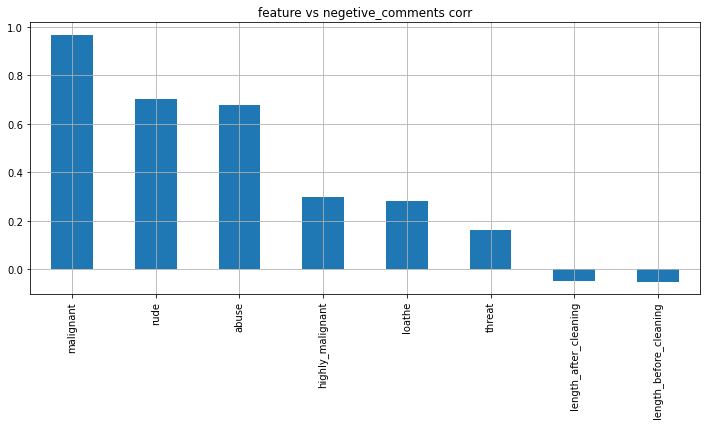

In [81]:
data1.drop("negetive_comments", axis=1).corrwith(data1["negetive_comments"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(12,5),grid='True',title='feature vs negetive_comments corr')
plt.show()

### Observations:

* Very obviously lengh before cleaning and lengh after cleaning are highly correlated with each others.
* Malignant and rude commrents are highly correlated with target.
* The two feature lengh before cleaning and lengh after cleaning are negetively correlated with target.

# Convert Train Data into Vectors:

In [82]:
def tf_idf(text):
    return TfidfVectorizer(min_df=3,smooth_idf=True).fit_transform(text)

In [83]:
x = tf_idf(data['comment_text'])
y = data['negetive_comments']

# Machine learning model building (Classification Model):

#### Here target variable is wheater the comment is negetive comments or not. So it is a binary data and the problem is classification problem.

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.957762013385807 on Random_state 88


#### Here for Random_state=88, the accuracy is maximum. So let's take it.

In [85]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (119678, 51153)
Training target shape: (119678,)
Test feature shape: (39893, 51153)
Test target shape: (39893,)


## 1. Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state= 88)
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))
print("-----------")
print("-----------")
print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.957762013385807
cof_mat:
  [[35763   144]
 [ 1541  2445]]
classification report:
                precision    recall  f1-score   support

           0       0.96      1.00      0.98     35907
           1       0.94      0.61      0.74      3986

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893

-----------
-----------
training score :  0.9591236484566921
testing score :  0.957762013385807


## 2. DecisionTree Classifier:

In [87]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.9441255358082872


cof_mat:  [[34814  1093]
 [ 1136  2850]]


classification report: 

               precision    recall  f1-score   support

           0       0.97      0.97      0.97     35907
           1       0.72      0.72      0.72      3986

    accuracy                           0.94     39893
   macro avg       0.85      0.84      0.84     39893
weighted avg       0.94      0.94      0.94     39893

-----------
-----------
training score :  0.9994735874596835
testing score :  0.9441255358082872


## 3. Gradient Boosting Classifier:

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.942070037349911


cof_mat:  [[35816    91]
 [ 2220  1766]]


classification report: 

               precision    recall  f1-score   support

           0       0.94      1.00      0.97     35907
           1       0.95      0.44      0.60      3986

    accuracy                           0.94     39893
   macro avg       0.95      0.72      0.79     39893
weighted avg       0.94      0.94      0.93     39893

-----------
-----------
training score :  0.9393372215444776
testing score :  0.942070037349911


# 4. Random Forest Classifier:

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.9590404331586995


cof_mat:  [[35606   301]
 [ 1333  2653]]


classification report:                precision    recall  f1-score   support

           0       0.96      0.99      0.98     35907
           1       0.90      0.67      0.76      3986

    accuracy                           0.96     39893
   macro avg       0.93      0.83      0.87     39893
weighted avg       0.96      0.96      0.96     39893

-----------
-----------
training score :  0.9994568759504671
testing score :  0.9590404331586995


# 5. Extra Trees Classifier:

In [91]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.9589401649412178


cof_mat:  [[35552   355]
 [ 1283  2703]]


classification report:                precision    recall  f1-score   support

           0       0.97      0.99      0.98     35907
           1       0.88      0.68      0.77      3986

    accuracy                           0.96     39893
   macro avg       0.92      0.83      0.87     39893
weighted avg       0.96      0.96      0.96     39893

-----------
-----------
training score :  0.9994735874596835
testing score :  0.9589401649412178


# 6. Ada Boost Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.9477101245832602


cof_mat:  [[35629   278]
 [ 1808  2178]]


classification report:                precision    recall  f1-score   support

           0       0.95      0.99      0.97     35907
           1       0.89      0.55      0.68      3986

    accuracy                           0.95     39893
   macro avg       0.92      0.77      0.82     39893
weighted avg       0.95      0.95      0.94     39893

-----------
-----------
training score :  0.944818596567456
testing score :  0.9477101245832602


### Observations:
Here for Random Forest the accuracy score is highest among all the models. But the difference between training and testing is large.

But for Logistic Regression the difference between training and testing is very small as well as it also gives good accuracy.

# AUC-ROC Curve:

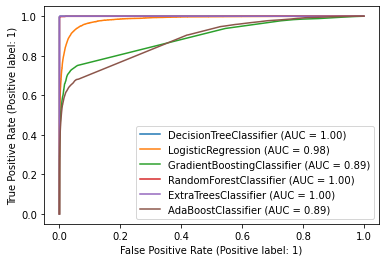

In [93]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_train, y_train)

plot_roc_curve(log, x_train, y_train, ax=disp.ax_)
plot_roc_curve(gbdt, x_train, y_train, ax=disp.ax_)
plot_roc_curve(rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve(etc, x_train, y_train, ax=disp.ax_)
plot_roc_curve(ada, x_train, y_train, ax=disp.ax_)

plt.show()

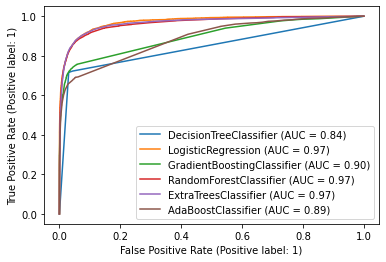

In [94]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_test, y_test)

plot_roc_curve(log, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbdt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf,x_test, y_test, ax=disp.ax_)
plot_roc_curve(etc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ada, x_test, y_test, ax=disp.ax_)

plt.show()

### Observations:
Here for Random Forest, Logistic Regression and Extratree classifier, the AUC score is same.

Here also we take Logistic Regression for final model. So it is the final model for this dataset.

# Hyperparameter tuning for final model:

In [95]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2','l1'], C=[1.0, 0.1,0.01])

grid_log = GridSearchCV(estimator=log, param_grid= grid,refit = True, verbose = 3 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.951 total time=   1.7s
[CV 2/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.953 total time=   1.8s
[CV 3/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.952 total time=   3.5s
[CV 4/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.953 total time=   1.7s
[CV 5/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.953 total time=   1.7s
[CV 1/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.951 total time=   1.9s
[CV 2/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.953 total time=   1.8s
[CV 3/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.952 total time=   2.1s
[CV 4/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.953 total time=   2.1s
[CV 5/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.953 total time=   1.9s
[CV 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.951 total time=   0.9s
[CV 2/5] END C=1.0, penalty=l2, solver=lib

# Final model:

In [96]:
from sklearn.metrics import log_loss
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")
print('log loss:',log_loss(y_test,y_pred))
print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.9624495525530795
cof_mat:

  [[35625   282]
 [ 1216  2770]]
classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98     35907
           1       0.91      0.69      0.79      3986

    accuracy                           0.96     39893
   macro avg       0.94      0.84      0.88     39893
weighted avg       0.96      0.96      0.96     39893

-----------
-----------
log loss: 1.2969521601797698
training score :  0.9624910175637962
testing score :  0.9624495525530795


## Confusion matrix:

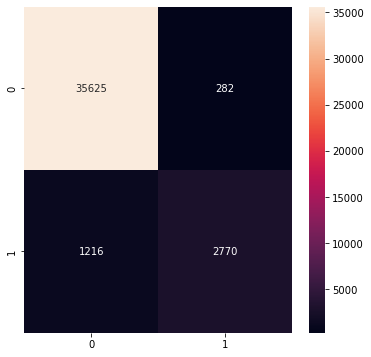

In [97]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

## Save the model for future use:

In [98]:
import pickle
pickle.dump(grid_log_best, open("Malgnant_Classification_model", "wb"))
load_Malignant_Classification_model= pickle.load(open("Malgnant_Classification_model", "rb"))

In [99]:
y_pred = load_Malignant_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
38353,0,0
20720,0,0
27201,0,0
33658,1,1
372,0,0
11147,0,0


## Convert Test Data into Vectors and Predict the final result:

In [101]:
tfidVectorizer = TfidfVectorizer(max_features = 51153,stop_words = 'english')
x_test_data = tfidVectorizer.fit_transform(data_test['comment_text'])
y_predict_final = grid_log_best.predict(x_test_data)
y_predict_final

array([0, 0, 0, ..., 0, 0, 0])

### Save the prediction of test dataset to csv file:

In [102]:
pd.DataFrame(y_predict_final).to_csv('Predicted_Final_Result_test_dataset.csv')

# Thank you